In [35]:
import pandas as pd
import numpy as np

### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [36]:
df = pd.read_csv('data/drugLibTrain_raw.tsv', sep='\t')
df.rename(columns={df.columns[0]:'ID'}, inplace=True)

In [37]:
df

,ID,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above
...,...,...,...,...,...,...,...,...,...
3102,1039,vyvanse,10,Highly Effective,Mild Side Effects,adhd,"Increased focus, attention, productivity. Bett...","Restless legs at night, insomnia, headache (so...","I took adderall once as a child, and it made m..."
3103,3281,zoloft,1,Ineffective,Extremely Severe Side Effects,depression,Emotions were somewhat blunted. Less moodiness.,"Weight gain, extreme tiredness during the day,...",I was on Zoloft for about 2 years total. I am ...
3104,1664,climara,2,Marginally Effective,Moderate Side Effects,total hysterctomy,---,Constant issues with the patch not staying on....,---
3105,2621,trileptal,8,Considerably Effective,Mild Side Effects,epilepsy,Controlled complex partial seizures.,"Dizziness, fatigue, nausea",Started at 2 doses of 300 mg a day and worked ...


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [38]:
df.nunique()

ID                   3107
urlDrugName           502
rating                 10
effectiveness           5
sideEffects             5
condition            1426
benefitsReview       3032
sideEffectsReview    2814
commentsReview       3047
dtype: int64

In [39]:
sr_cat = df.nunique()
ls_cols = sr_cat[sr_cat<=10].index.tolist()

In [40]:
df_fil = df.copy()
df_fil = df_fil[ls_cols]

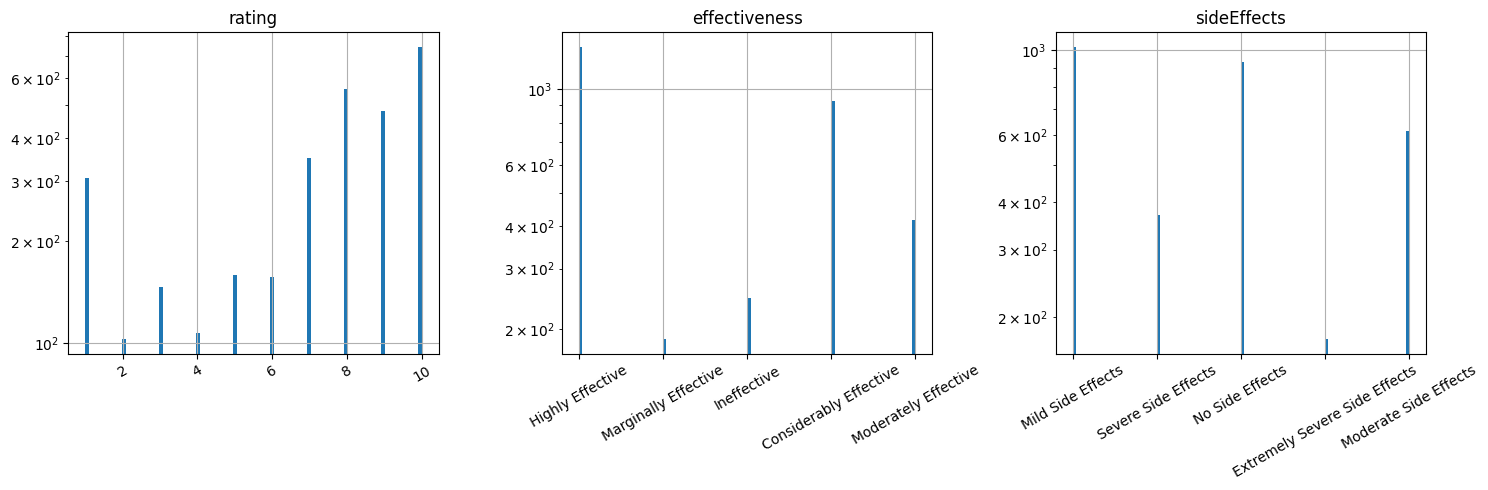

In [41]:
import matplotlib.pyplot as plt
#we can see in all variables except for years and stars that the frequency of 0 es huge
figure = plt.figure(figsize=(15,5))

for n, c in enumerate(df_fil.columns):
  ax = figure.add_subplot(1,3,n+1)
  ax.set_title(c)
  ax.set_yscale("log") #the log scale help us to have a better idea of our data when the distribution is not fair
  df_fil[c].hist(ax=ax, bins=100)
  ax.tick_params('x', rotation=30)
figure.tight_layout() #this feature separate the graphs correctly

#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [42]:
cat_cols = df_fil.dtypes[df_fil.dtypes == object].index.tolist()

df_num = df_fil.copy()

df_num = pd.get_dummies(df_num,columns=cat_cols, drop_first=True)

In [44]:
df_num.shape

(3107, 9)

#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

In [46]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

kmax = 20
ls_sil = []

for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_num)
    sil = silhouette_score(df_num, kmeans.labels_)
    ls_sil.append(sil)

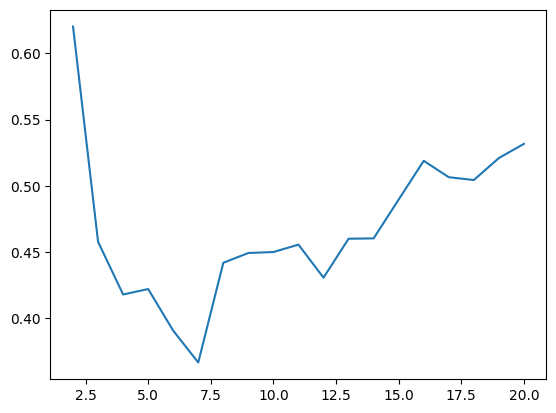

In [47]:
plt.plot(np.arange(2, kmax+1), ls_sil)

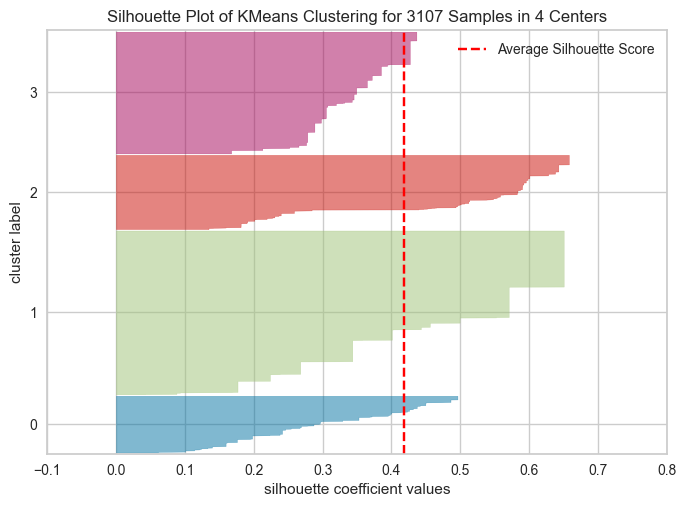

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 3107 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [61]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

# Instantiate the clustering model and visualizer
model = KMeans(4, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(df_num)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

#### Genera el K Means 

In [62]:
kmeans = KMeans(4, random_state=0)
kmeans.fit(df_num)

KMeans(n_clusters=4, random_state=0)

#### Muestra en un grafico de quesito la distribución de los distintos clusters

In [67]:
clusters.shape[0]

3107

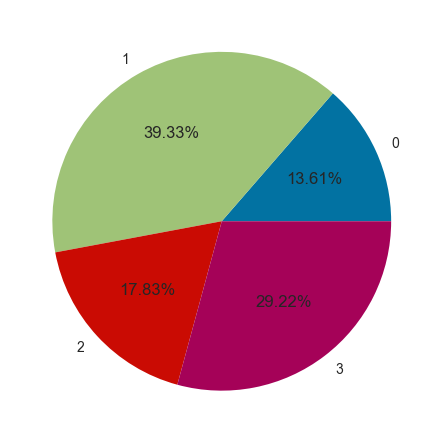

In [78]:
clusters = kmeans.labels_
N = clusters.shape[0]
clt_unique = np.unique(clusters)
pct_clusters = [clusters[clusters == clt].shape[0] for clt in clt_unique]

plt.pie(pct_clusters, labels=clt_unique, autopct='%1.2f%%');